# Tarea || Binpacking: Análisis de resultados del modelo

En una Notebook de Jupyter:

Lea y manipule los datos proporcionados en el archivo adjunto. Son los resultados de la ejecucion del modelo matemático para el problema de Bin packing sobre un conjunto de instancias de tamaño n con un número máximo posible de contenedores m, con capacidad cap, y volúmenes de los objetos generados en el rango rn. Se generaron 5 instancias por cada combinacion de los diferentes parámetros.

Intente concluir sobre como se comportará el numero promedio de objetos:

1. Cuando n crece 

2. Según el valor de la capacidad 

3. Según el rango en que se generan los volúmenes de los objetos 

4. o combinaciones de ellos.

Intente concluir sobre como se comportará el tiempo de ejecución del modelo: 

1. Cuando n crece

2. Según el valor de la capacidad

3. SegÚn el rango en que se generan los volúmenes de los objetos

4. o combinaciones de ellos.

Genere las graficas para apoyar sus conclusiones.

In [1]:
import pandas as pd

In [55]:
binpacking = pd.read_csv("TablaResumen_Mip.txt", sep=" ", header=None)
binpacking.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,File,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_1...,Status,2,Obj,10.0,ObjBound,10.0,GAP,0.0,GRB.Time,0.003061
1,File,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_2...,Status,2,Obj,9.0,ObjBound,9.0,GAP,0.0,GRB.Time,0.003294
2,File,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_3...,Status,2,Obj,10.0,ObjBound,10.0,GAP,0.0,GRB.Time,0.003349
3,File,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_4...,Status,2,Obj,10.0,ObjBound,10.0,GAP,0.0,GRB.Time,0.003539
4,File,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_5...,Status,2,Obj,10.0,ObjBound,10.0,GAP,0.0,GRB.Time,0.003262


In [7]:
binpacking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       360 non-null    object 
 1   1       360 non-null    object 
 2   2       360 non-null    object 
 3   3       360 non-null    int64  
 4   4       360 non-null    object 
 5   5       360 non-null    float64
 6   6       360 non-null    object 
 7   7       360 non-null    float64
 8   8       360 non-null    object 
 9   9       360 non-null    float64
 10  10      360 non-null    object 
 11  11      360 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 33.9+ KB


In [6]:
binpacking.describe()

,3,5,7,9,11
count,360.0,360.000000,360.000000,360.0,360.000000
mean,2.0,44.475000,44.475000,0.0,0.087509
std,0.0,38.478651,38.478651,0.0,0.104680
min,2.0,2.000000,2.000000,0.0,0.003061
25%,2.0,15.000000,15.000000,0.0,0.019167
50%,2.0,30.500000,30.500000,0.0,0.054930
75%,2.0,62.750000,62.750000,0.0,0.124141
max,2.0,150.000000,150.000000,0.0,1.109019


In [56]:
df1 = binpacking.drop(columns=list(range(0,12,2)), axis=0) 
df1.columns = ["filename", "mip_status", "obj", "mip_bound", "mip_gap", "mip_Time"]
df1.head()

,filename,mip_status,obj,mip_bound,mip_gap,mip_Time
0,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_1...,2,10.0,10.0,0.0,0.003061
1,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_2...,2,9.0,9.0,0.0,0.003294
2,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_3...,2,10.0,10.0,0.0,0.003349
3,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_4...,2,10.0,10.0,0.0,0.003539
4,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_5...,2,10.0,10.0,0.0,0.003262


In [57]:
df2 = df1["filename"].str.split("_", expand = True)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10
0,instancias/bin,n,10,m,10,cap,30,rn,15-30,rep,1.txt
1,instancias/bin,n,10,m,10,cap,30,rn,15-30,rep,2.txt
2,instancias/bin,n,10,m,10,cap,30,rn,15-30,rep,3.txt
3,instancias/bin,n,10,m,10,cap,30,rn,15-30,rep,4.txt
4,instancias/bin,n,10,m,10,cap,30,rn,15-30,rep,5.txt


In [58]:
df3 = pd.concat([df2,df1], axis=1)
df3[[2, 4, 6]] = df3[[2, 4, 6]].apply(pd.to_numeric, errors='coerce')
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,filename,mip_status,obj,mip_bound,mip_gap,mip_Time
0,instancias/bin,n,10,m,10,cap,30,rn,15-30,rep,1.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_1...,2,10.0,10.0,0.0,0.003061
1,instancias/bin,n,10,m,10,cap,30,rn,15-30,rep,2.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_2...,2,9.0,9.0,0.0,0.003294
2,instancias/bin,n,10,m,10,cap,30,rn,15-30,rep,3.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_3...,2,10.0,10.0,0.0,0.003349
3,instancias/bin,n,10,m,10,cap,30,rn,15-30,rep,4.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_4...,2,10.0,10.0,0.0,0.003539
4,instancias/bin,n,10,m,10,cap,30,rn,15-30,rep,5.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_5...,2,10.0,10.0,0.0,0.003262


In [59]:
df3 = df3.rename(columns={2: "n", 4: "m", 6: "cap", 8: "rango", 10: "rep"}) # renombrando columnas
df3 = df3.drop(columns=[0,1,3,5,7,9], axis=0) # eliminando columnas
df3

,n,m,cap,rango,rep,filename,mip_status,obj,mip_bound,mip_gap,mip_Time
0,10,10,30,15-30,1.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_1...,2,10.0,10.0,0.0,0.003061
1,10,10,30,15-30,2.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_2...,2,9.0,9.0,0.0,0.003294
2,10,10,30,15-30,3.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_3...,2,10.0,10.0,0.0,0.003349
3,10,10,30,15-30,4.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_4...,2,10.0,10.0,0.0,0.003539
4,10,10,30,15-30,5.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_5...,2,10.0,10.0,0.0,0.003262
...,...,...,...,...,...,...,...,...,...,...,...
355,150,150,180,45-60,1.txt,instancias/bin_n_150_m_150_cap_180_rn_45-60_re...,2,47.0,47.0,0.0,0.330408
356,150,150,180,45-60,2.txt,instancias/bin_n_150_m_150_cap_180_rn_45-60_re...,2,47.0,47.0,0.0,0.319146
357,150,150,180,45-60,3.txt,instancias/bin_n_150_m_150_cap_180_rn_45-60_re...,2,48.0,48.0,0.0,0.334474
358,150,150,180,45-60,4.txt,instancias/bin_n_150_m_150_cap_180_rn_45-60_re...,2,47.0,47.0,0.0,0.302806


In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   n           360 non-null    int64  
 1   m           360 non-null    int64  
 2   cap         360 non-null    int64  
 3   rango       360 non-null    object 
 4   rep         360 non-null    object 
 5   filename    360 non-null    object 
 6   mip_status  360 non-null    int64  
 7   obj         360 non-null    float64
 8   mip_bound   360 non-null    float64
 9   mip_gap     360 non-null    float64
 10  mip_Time    360 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 31.1+ KB


In [60]:
# Writing to .xlsx file
df3.to_excel("binpacking.xlsx", sheet_name="mip_alg")

# No. promedio de objetos por tamaño de instancia n

In [88]:
df_instance = df3.groupby(["n"])[["obj", "mip_bound", "mip_Time"]].mean()
df_instance

,obj,mip_bound,mip_Time
n,,,
10,5.888889,5.888889,0.003627
30,16.622222,16.622222,0.013376
50,28.000000,28.000000,0.034316
70,38.977778,38.977778,0.039404
90,50.088889,50.088889,0.070671
110,60.977778,60.977778,0.101024
130,72.155556,72.155556,0.175337
150,83.088889,83.088889,0.262316


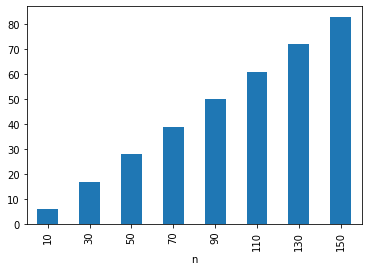

In [89]:
plot = df_instance["obj"].plot(kind="bar")
fig = plot.get_figure()
fig.savefig("instance_size_n.jpg")

A medida que el tamaño de la instancia n aumenta, el número promedio de objetos tiende a aumentar de manera lineal.

# No. promedio de objetos por capacidad m

In [90]:
df_capacidad = df3.groupby(["cap"])[["obj", "mip_bound", "mip_Time"]].mean()
df_capacidad

,obj,mip_bound,mip_Time
cap,,,
30,75.1250,75.1250,0.075546
45,80.0000,80.0000,0.065001
60,52.9375,52.9375,0.076192
90,26.4750,26.4750,0.104225
120,40.0000,40.0000,0.075929
135,20.9000,20.9000,0.091656
180,25.4250,25.4250,0.118613


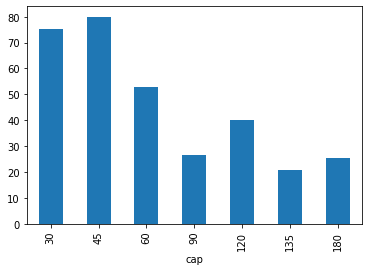

In [91]:
plot = df_capacidad["obj"].plot(kind="bar")
fig = plot.get_figure()
fig.savefig("capacidad_m.jpg")

A medida que la capacidad m incrementa, el número promedio de objetos tiende a disminuir.

# No. promedio de objetos por rango

In [92]:
df_rango = df3.groupby(["rango"])[["obj", "mip_bound", "mip_Time"]].mean()
df_rango

,obj,mip_bound,mip_Time
rango,,,
15-30,38.766667,38.766667,0.099838
30-45,46.183333,46.183333,0.077569
45-60,48.475000,48.475000,0.085119


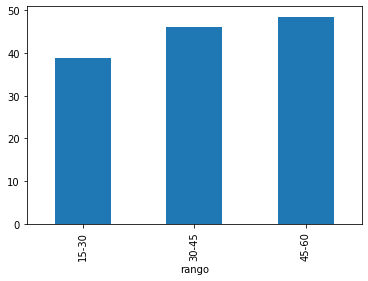

In [93]:
plot = df_rango["obj"].plot(kind="bar")
fig = plot.get_figure()
fig.savefig("rango_rn.jpg")

A medida que el rango de los volúmenes de los objetos incrementa, el número promedio de objetos tiende a aumentar.

# No. promedio de objetos por tamaño de instancia y capacidad

In [101]:
df4 = df3.sort_values(by=["n", "cap"])
df4.head(20)

,n,m,cap,rango,rep,filename,mip_status,obj,mip_bound,mip_gap,mip_Time
0,10,10,30,15-30,1.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_1...,2,10.0,10.0,0.0,0.003061
1,10,10,30,15-30,2.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_2...,2,9.0,9.0,0.0,0.003294
2,10,10,30,15-30,3.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_3...,2,10.0,10.0,0.0,0.003349
3,10,10,30,15-30,4.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_4...,2,10.0,10.0,0.0,0.003539
4,10,10,30,15-30,5.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_5...,2,10.0,10.0,0.0,0.003262
15,10,10,45,30-45,1.txt,instancias/bin_n_10_m_10_cap_45_rn_30-45_rep_1...,2,10.0,10.0,0.0,0.003494
16,10,10,45,30-45,2.txt,instancias/bin_n_10_m_10_cap_45_rn_30-45_rep_2...,2,10.0,10.0,0.0,0.003536
17,10,10,45,30-45,3.txt,instancias/bin_n_10_m_10_cap_45_rn_30-45_rep_3...,2,10.0,10.0,0.0,0.003323
18,10,10,45,30-45,4.txt,instancias/bin_n_10_m_10_cap_45_rn_30-45_rep_4...,2,10.0,10.0,0.0,0.003198
19,10,10,45,30-45,5.txt,instancias/bin_n_10_m_10_cap_45_rn_30-45_rep_5...,2,10.0,10.0,0.0,0.003467


In [106]:
df_n_cap = df4.groupby(["n", "cap"])[["obj", "mip_bound", "mip_Time"]].mean()
df_n_cap

obj  mip_bound  mip_Time
n   cap                            
10  30     9.8        9.8  0.003301
    45    10.0       10.0  0.003404
    60     7.1        7.1  0.003498
    90     3.6        3.6  0.003843
    120    5.0        5.0  0.003999
    135    3.0        3.0  0.003539
    180    3.8        3.8  0.003720
30  30    27.6       27.6  0.012288
    45    30.0       30.0  0.011695
    60    20.1       20.1  0.012229
    90     9.7        9.7  0.012909
    120   15.0       15.0  0.014059
    135    8.2        8.2  0.013471
    180    9.2        9.2  0.018593
50  30    48.6       48.6  0.020296
    45    50.0       50.0  0.020671
    60    33.2       33.2  0.020548
    90    16.5       16.5  0.057420
    120   25.0       25.0  0.024076
    135   13.0       13.0  0.044277
    180   16.0       16.0  0.043587
70  30    66.4       66.4  0.035403
    45    70.0       70.0  0.032174
    60    46.3       46.3  0.035342
    90    23.1       23.1  0.041761
    120   35.0       35.0  0.041670
    135   18.4       18.4  0.041842
    180   22.2       22.2  0.049337
90  30    84.8       84.8  0.061049
    45    90.0       90.0  0.070527
    60    59.4       59.4  0.059338
    90    30.1       30.1  0.064466
    120   45.0       45.0  0.062882
    135   23.4       23.4  0.102047
    180   28.6       28.6  0.091927
110 30   101.6      101.6  0.083349
    45   110.0      110.0  0.083960
    60    72.8       72.8  0.088515
    90    36.6       36.6  0.115622
    120   55.0       55.0  0.099448
    135   28.6       28.6  0.105020
    180   34.8       34.8  0.129160
130 30   122.4      122.4  0.123677
    45   130.0      130.0  0.126252
    60    85.8       85.8  0.143177
    90    42.6       42.6  0.202503
    120   65.0       65.0  0.151194
    135   33.8       33.8  0.181496
    180   41.4       41.4  0.304054
150 30   139.8      139.8  0.265001
    45   150.0      150.0  0.171327
    60    98.8       98.8  0.246886
    90    49.6       49.6  0.335280
    120   75.0       75.0  0.210105
    135   38.8       38.8  0.241554
    180   47.4       47.4  0.308525

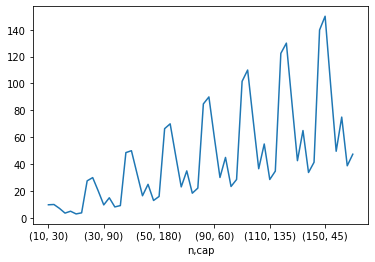

In [108]:
plot = df_n_cap["obj"].plot()
fig = plot.get_figure()
fig.savefig("instancia_capacidad.jpg")

A medida que el tamaño de la instancia n aumenta y la capacidad m disminuye; el número promedio de objetos tiende a aumentar. 

# No. promedio de objetos por tamaño de instancia y rango

In [109]:
df5 = df3.sort_values(by=["n", "rango"])
df5.head(20)

,n,m,cap,rango,rep,filename,mip_status,obj,mip_bound,mip_gap,mip_Time
0,10,10,30,15-30,1.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_1...,2,10.0,10.0,0.0,0.003061
1,10,10,30,15-30,2.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_2...,2,9.0,9.0,0.0,0.003294
2,10,10,30,15-30,3.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_3...,2,10.0,10.0,0.0,0.003349
3,10,10,30,15-30,4.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_4...,2,10.0,10.0,0.0,0.003539
4,10,10,30,15-30,5.txt,instancias/bin_n_10_m_10_cap_30_rn_15-30_rep_5...,2,10.0,10.0,0.0,0.003262
5,10,10,60,15-30,1.txt,instancias/bin_n_10_m_10_cap_60_rn_15-30_rep_1...,2,5.0,5.0,0.0,0.004116
6,10,10,60,15-30,2.txt,instancias/bin_n_10_m_10_cap_60_rn_15-30_rep_2...,2,4.0,4.0,0.0,0.003584
7,10,10,60,15-30,3.txt,instancias/bin_n_10_m_10_cap_60_rn_15-30_rep_3...,2,4.0,4.0,0.0,0.003629
8,10,10,60,15-30,4.txt,instancias/bin_n_10_m_10_cap_60_rn_15-30_rep_4...,2,4.0,4.0,0.0,0.003677
9,10,10,60,15-30,5.txt,instancias/bin_n_10_m_10_cap_60_rn_15-30_rep_5...,2,4.0,4.0,0.0,0.003505


In [110]:
df_n_rango = df5.groupby(["n", "rango"])[["obj", "mip_bound", "mip_Time"]].mean()
df_n_rango

obj  mip_bound  mip_Time
n   rango                                
10  15-30   5.466667   5.466667  0.003566
    30-45   5.933333   5.933333  0.003645
    45-60   6.266667   6.266667  0.003671
30  15-30  14.533333  14.533333  0.012290
    30-45  17.266667  17.266667  0.012987
    45-60  18.066667  18.066667  0.014851
50  15-30  24.800000  24.800000  0.043797
    30-45  28.866667  28.866667  0.029696
    45-60  30.333333  30.333333  0.029453
70  15-30  34.333333  34.333333  0.039565
    30-45  40.200000  40.200000  0.037780
    45-60  42.400000  42.400000  0.040866
90  15-30  43.533333  43.533333  0.065817
    30-45  52.200000  52.200000  0.076376
    45-60  54.533333  54.533333  0.069819
110 15-30  52.800000  52.800000  0.104936
    30-45  63.533333  63.533333  0.093982
    45-60  66.600000  66.600000  0.104153
130 15-30  62.733333  62.733333  0.177144
    30-45  74.933333  74.933333  0.155519
    45-60  78.800000  78.800000  0.193348
150 15-30  71.933333  71.933333  0.351590
    30-45  86.533333  86.533333  0.210568
    45-60  90.800000  90.800000  0.224790

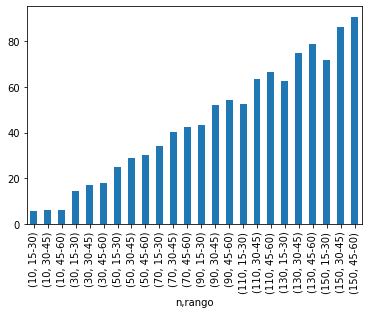

In [113]:
plot = df_n_rango["obj"].plot(kind="bar")
fig = plot.get_figure()
fig.savefig("instancia_rango.jpg")

A medida que el tamaño de la instancia n incrementa y el rango de los volúmenes de los objetos también aumenta; el número promedio de objetos tiende a aumentar. 

# Tiempo total de ejecución por tamaño de instancia n

In [114]:
df_instance_time = df3.groupby(["n"]).agg({"obj":"mean", "mip_bound":"mean", "mip_Time":"sum"})
df_instance_time

,obj,mip_bound,mip_Time
n,,,
10,5.888889,5.888889,0.163223
30,16.622222,16.622222,0.601908
50,28.000000,28.000000,1.544203
70,38.977778,38.977778,1.773159
90,50.088889,50.088889,3.180197
110,60.977778,60.977778,4.546063
130,72.155556,72.155556,7.890170
150,83.088889,83.088889,11.804226


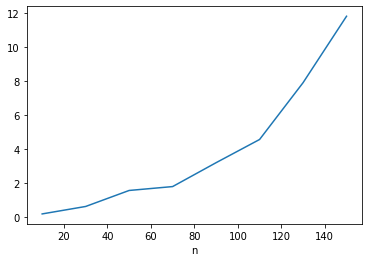

In [116]:
plot = df_instance_time["mip_Time"].plot()
fig = plot.get_figure()
fig.savefig("instance_time.jpg")

A medida que el tamaño de la instancia n aumenta, el tiempo total de ejecución tiende a crecer de manera exponencial.

# Tiempo total de ejecución por capacidad m

In [117]:
df_capacity_time = df3.groupby(["cap"]).agg({"obj":"mean", "mip_bound":"mean", "mip_Time":"sum"})
df_capacity_time

,obj,mip_bound,mip_Time
cap,,,
30,75.1250,75.1250,3.021825
45,80.0000,80.0000,2.600053
60,52.9375,52.9375,6.095332
90,26.4750,26.4750,8.338038
120,40.0000,40.0000,3.037159
135,20.9000,20.9000,3.666232
180,25.4250,25.4250,4.744510


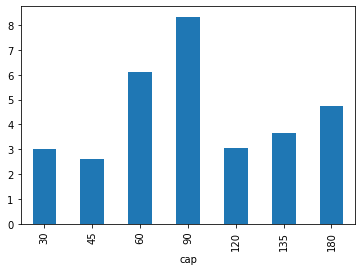

In [119]:
plot = df_capacity_time["mip_Time"].plot(kind="bar")
fig = plot.get_figure()
fig.savefig("capacity_time.jpg")

Para una capacidad igual a 90 se observa un valor máximo en el tiempo total de ejecución.

# Tiempo total de ejecución por rango

In [120]:
df_rango_tiempo = df3.groupby(["rango"]).agg({"obj":"mean", "mip_bound":"mean", "mip_Time":"sum"})
df_rango_tiempo

,obj,mip_bound,mip_Time
rango,,,
15-30,38.766667,38.766667,11.980594
30-45,46.183333,46.183333,9.308301
45-60,48.475000,48.475000,10.214254


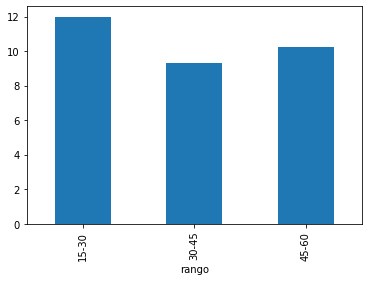

In [122]:
plot = df_rango_tiempo["mip_Time"].plot(kind="bar")
fig = plot.get_figure()
fig.savefig("rango_tiempo.jpg")

Se observa que el valor máximo en el tiempo total de ejecución se encuentra en el rango 15 - 30 de los volúmenes de los objetos generados.

# Tiempo total de ejecución por tamaño de instancia n y capacidad m

In [124]:
df6 = df3.sort_values(by=["n", "cap"])
df_n_capacidad = df6.groupby(["n", "cap"]).agg({"obj":"mean", "mip_bound":"mean", "mip_Time":"sum"})
df_n_capacidad

obj  mip_bound  mip_Time
n   cap                            
10  30     9.8        9.8  0.016505
    45    10.0       10.0  0.017018
    60     7.1        7.1  0.034977
    90     3.6        3.6  0.038433
    120    5.0        5.0  0.019995
    135    3.0        3.0  0.017695
    180    3.8        3.8  0.018600
30  30    27.6       27.6  0.061441
    45    30.0       30.0  0.058474
    60    20.1       20.1  0.122290
    90     9.7        9.7  0.129090
    120   15.0       15.0  0.070293
    135    8.2        8.2  0.067357
    180    9.2        9.2  0.092963
50  30    48.6       48.6  0.101479
    45    50.0       50.0  0.103355
    60    33.2       33.2  0.205475
    90    16.5       16.5  0.574196
    120   25.0       25.0  0.120381
    135   13.0       13.0  0.221384
    180   16.0       16.0  0.217933
70  30    66.4       66.4  0.177014
    45    70.0       70.0  0.160872
    60    46.3       46.3  0.353418
    90    23.1       23.1  0.417613
    120   35.0       35.0  0.208351
    135   18.4       18.4  0.209208
    180   22.2       22.2  0.246683
90  30    84.8       84.8  0.305247
    45    90.0       90.0  0.352635
    60    59.4       59.4  0.593381
    90    30.1       30.1  0.644656
    120   45.0       45.0  0.314408
    135   23.4       23.4  0.510237
    180   28.6       28.6  0.459633
110 30   101.6      101.6  0.416747
    45   110.0      110.0  0.419800
    60    72.8       72.8  0.885155
    90    36.6       36.6  1.156221
    120   55.0       55.0  0.497238
    135   28.6       28.6  0.525102
    180   34.8       34.8  0.645800
130 30   122.4      122.4  0.618385
    45   130.0      130.0  0.631262
    60    85.8       85.8  1.431772
    90    42.6       42.6  2.025029
    120   65.0       65.0  0.755969
    135   33.8       33.8  0.907481
    180   41.4       41.4  1.520272
150 30   139.8      139.8  1.325007
    45   150.0      150.0  0.856637
    60    98.8       98.8  2.468864
    90    49.6       49.6  3.352800
    120   75.0       75.0  1.050524
    135   38.8       38.8  1.207768
    180   47.4       47.4  1.542626

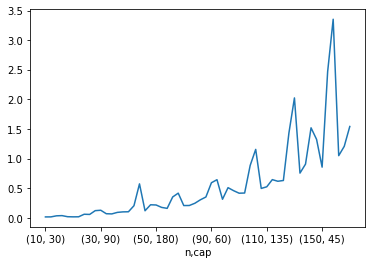

In [127]:
plot = df_n_capacidad["mip_Time"].plot()
fig = plot.get_figure()
fig.savefig("n_capacidad.jpg")

Se observa que el valor máximo en el tiempo total de ejecución se encuentra en la combinación entre el tamaño de la instancia n igual a 150 y una capacidad igual a 90.